# 4 Pre-Processing and Training Data<a id='4_Pre-Processing_and_Training_Data'></a>

## 4.1 Contents<a id='4.1_Contents'></a>
* [4 Pre-Processing and Training Data](#4_Pre-Processing_and_Training_Data)
  * [4.1 Contents](#4.1_Contents)
  * [4.2 Introduction](#4.2_Introduction)
  * [4.3 Imports](#4.3_Imports)
  * [4.4 Load Data](#4.4_Load_Data)
  * [4.5 Train/Test Split](#4.5_Train/Test_Split)
  * [4.6 Scaling data](#4.6_Scaling_data)
  * [4.7 Initial Models](#4.7_Initial_Models)
  * [4.8 Models Perfomance](#4.8_Models_Perfomance)
  * [4.9 Final Model Selection](#4.9_Final_Model_Selection)    
  * [4.10 Data quantity assessment](#4.10_Data_quantity_assessment)
  * [4.11 Save best model object](#4.11_Save_best_model_object)
  


## 4.2 Introduction<a id='4.2_Introduction'></a>

In preceding notebooks, performed preliminary assessments of data quality and refined the question to be answered. The detecting the normal ecgs was the primary aim. 

In this notebook we'll start to build machine learning models. The first model is a baseline performance comparitor for any subsequent model. Then, models are built and the process of efficiently and robustly creating and assessing models against it will be performed. 

## 4.3 Imports<a id='4.3_Imports'></a>

In [2]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC, LinearSVC

from sklearn.neighbors import KNeighborsClassifier
# from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
# from sklearn.neural_network import MLPClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_regression, SelectFromModel

import datetime

from library.sb_utils import save_file

In c:\Users\armag\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In c:\Users\armag\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In c:\Users\armag\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In c:\Users\armag\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In c:\Users\armag\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

## 4.4 Load Data<a id='4.4_Load_Data'></a>

In [3]:
ecg_data = pd.read_csv('../data/ecg_data_step3_features.csv')
ecg_data.head().T

,0,1,2,3,4
t0,-0.112522,-1.100878,-0.567088,0.490473,0.800232
t1,-2.827204,-3.996840,-2.593450,-1.914407,-0.874252
t2,-3.773897,-4.285843,-3.874230,-3.616364,-2.384761
t3,-4.349751,-4.506579,-4.584095,-4.318823,-3.973292
t4,-4.376041,-4.022377,-4.187449,-4.268016,-4.338224
...,...,...,...,...,...
t136,0.228077,0.476333,-0.532197,0.990133,0.960304
t137,0.123431,0.773820,0.321097,1.086798,0.971020
t138,0.925286,1.119621,0.904227,1.403011,1.614392
t139,0.193137,-1.436250,-0.421797,-0.383564,1.421456


In [4]:
# ecg_data.Target = ['ABNORMAL' if x == 0.0 else 'NORMAL' for x in ecg_data.Target] 
ecg_data.Target = ecg_data.Target.astype('int')
ecg_data.head().T

,0,1,2,3,4
t0,-0.112522,-1.100878,-0.567088,0.490473,0.800232
t1,-2.827204,-3.996840,-2.593450,-1.914407,-0.874252
t2,-3.773897,-4.285843,-3.874230,-3.616364,-2.384761
t3,-4.349751,-4.506579,-4.584095,-4.318823,-3.973292
t4,-4.376041,-4.022377,-4.187449,-4.268016,-4.338224
...,...,...,...,...,...
t136,0.228077,0.476333,-0.532197,0.990133,0.960304
t137,0.123431,0.773820,0.321097,1.086798,0.971020
t138,0.925286,1.119621,0.904227,1.403011,1.614392
t139,0.193137,-1.436250,-0.421797,-0.383564,1.421456


## 4.5 Train/Test Split<a id='4.5_Train/Test_Split'></a>

In [5]:
X_train, X_test, y_train, y_test = train_test_split(ecg_data.drop(columns='Target'), 
                                                    ecg_data.Target, test_size=0.3, 
                                                    random_state=47)

In [6]:
X_train.shape, y_train.shape, X_test.shape,  y_test.shape

((3498, 140), (3498,), (1500, 140), (1500,))

## 4.6 Scaling data<a id='4.6_Scaling_data'></a>

In [7]:
def scale_data(Scaler,X_train, X_test):
    sc = Scaler
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    return X_train, X_test

X_train, X_test = scale_data(StandardScaler(),X_train, X_test )

## 4.7 Models<a id='4.7_Models'></a>

In [15]:
# Show model's performance

def model_results(model, y_train, y_tr_pred, y_test, y_te_pred ):

    print( model)
    print('-------------------------------------')
    # print(f'Accuracy on training data: {accuracy_score(y_tr_pred, y_train):.2f}')
    # print(f'Accuracy on test data: {accuracy_score(y_te_pred, y_test):.2f}')
    # print('-------------------------------------')
    # print(f'Precision score on training data: {precision_score(y_train, y_tr_pred):.2f}')
    # print(f'Precision score  on test data: {precision_score( y_test, y_te_pred):.2f}')
    # print('-------------------------------------')
    # print(f'Recall score on training data: {recall_score(y_train, y_tr_pred):.2f}')
    # print(f'Recall score  on test data: {recall_score( y_test, y_te_pred):.2f}')
    # print('-------------------------------------')
    # print(f'F1 score on training data: {f1_score(y_train, y_tr_pred):.2f}')
    # print(f'F1 score  on test data: {f1_score( y_test, y_te_pred):.2f}')
    # print('-------------------------------------')
    print("Classification Report for Training Data")
    print(classification_report(y_train, y_tr_pred, target_names=['ABNORMAL','NORMAL']))
    print('-------------------------------------')
    print("Classification Report for Test Data")
    print(classification_report(y_test, y_te_pred, target_names=['ABNORMAL','NORMAL']))


In [16]:
# Plot Model's ROC

def plot_ROC(model,X, y, title_method ):
    
    logit_roc_auc = roc_auc_score(y, model.predict(X))
    fpr, tpr, thresholds = roc_curve(y, model.predict_proba(X)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='{} (area = {:2.2%})'.format(title_method,logit_roc_auc))
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

In [20]:
#  train and test a model 

def train_test_model(model, grid_params, X_train, y_train, X_test, y_test, model_name):
    
    model_grid_cv = GridSearchCV(model, param_grid=grid_params, cv=5, n_jobs=-1)
    # print(model_grid_cv.get_params().keys())
    model_grid_cv.fit(X_train, y_train)
    
    y_tr_pred = model_grid_cv.predict(X_train)
    y_te_pred = model_grid_cv.predict(X_test)

    # print("Tuned Hyperparameters :", model_grid_cv.best_params_)
    # print("Accuracy :",model_grid_cv.best_score_)

    model_results(model_name, y_train, y_tr_pred, y_test, y_te_pred )  
    plot_ROC(model_grid_cv, X_test, y_test, model_name)

    row_model = {'model_name':model_name, 'Accuracy on training data':accuracy_score(y_tr_pred, y_train), 'Accuracy on test data':accuracy_score(y_te_pred, y_test),
'Precision score on training data':precision_score(y_train, y_tr_pred), 'Precision score  on test data':precision_score( y_test, y_te_pred), 
'Recall score on training data':recall_score(y_train, y_tr_pred), 'Recall score  on test data':recall_score( y_test, y_te_pred), 
'F1 score on training data':f1_score(y_train, y_tr_pred), 'F1 score  on test data':f1_score( y_test, y_te_pred), 
'Classification Report for Training Data':classification_report(y_train, y_tr_pred, target_names=['ABNORMAL','NORMAL']), 
'Classification Report for Test Data':classification_report(y_test, y_te_pred, target_names=['ABNORMAL','NORMAL']), 
'best_params_':model_grid_cv.best_params_

    }
    return(row_model) 



Logistic Regression
-------------------------------------
Classification Report for Training Data
              precision    recall  f1-score   support

    ABNORMAL       0.99      0.98      0.99      1462
      NORMAL       0.99      0.99      0.99      2036

    accuracy                           0.99      3498
   macro avg       0.99      0.99      0.99      3498
weighted avg       0.99      0.99      0.99      3498

-------------------------------------
Classification Report for Test Data
              precision    recall  f1-score   support

    ABNORMAL       0.99      0.99      0.99       617
      NORMAL       0.99      0.99      0.99       883

    accuracy                           0.99      1500
   macro avg       0.99      0.99      0.99      1500
weighted avg       0.99      0.99      0.99      1500



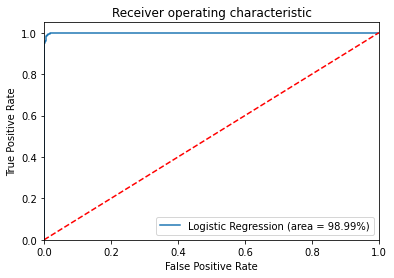

Random Forest
-------------------------------------
Classification Report for Training Data
              precision    recall  f1-score   support

    ABNORMAL       1.00      1.00      1.00      1462
      NORMAL       1.00      1.00      1.00      2036

    accuracy                           1.00      3498
   macro avg       1.00      1.00      1.00      3498
weighted avg       1.00      1.00      1.00      3498

-------------------------------------
Classification Report for Test Data
              precision    recall  f1-score   support

    ABNORMAL       0.99      0.99      0.99       617
      NORMAL       0.99      0.99      0.99       883

    accuracy                           0.99      1500
   macro avg       0.99      0.99      0.99      1500
weighted avg       0.99      0.99      0.99      1500



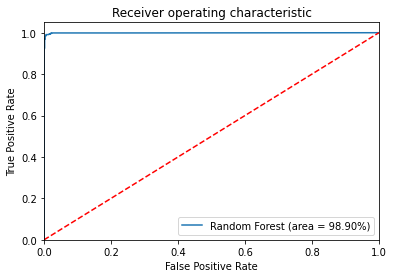

K_Neighbors
-------------------------------------
Classification Report for Training Data
              precision    recall  f1-score   support

    ABNORMAL       0.99      1.00      1.00      1462
      NORMAL       1.00      0.99      1.00      2036

    accuracy                           1.00      3498
   macro avg       1.00      1.00      1.00      3498
weighted avg       1.00      1.00      1.00      3498

-------------------------------------
Classification Report for Test Data
              precision    recall  f1-score   support

    ABNORMAL       0.99      0.99      0.99       617
      NORMAL       0.99      0.99      0.99       883

    accuracy                           0.99      1500
   macro avg       0.99      0.99      0.99      1500
weighted avg       0.99      0.99      0.99      1500



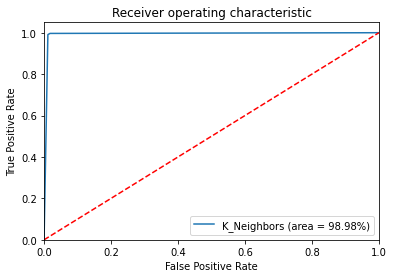

In [18]:
# define 3 models LogisticRegression, RandomForestClassifier, and KNeighborsClassifier and their parameters
params = [
    {'classifier' : [LogisticRegression(random_state=42)], 'model_name' : ['Logistic Regression'],
    'param_grid': { 'penalty' : ['l1', 'l2', None], 'C' : np.logspace(-3,3,7), 'solver' : ['newton-cg', 'lbfgs', 'liblinear']}},
    {'classifier' : [RandomForestClassifier(random_state=42)], 'model_name' : ['Random Forest'],
    'param_grid': { 'n_estimators' : list(range(10,100,200)), 'max_depth' : [4,5,6,7,8], 'criterion' :['gini', 'entropy']}}, 
    {'classifier' : [KNeighborsClassifier()], 'model_name' : ['K_Neighbors'],
    'param_grid': { 'weights': ['uniform','distance'],'n_neighbors': [2]}}
]


# define a dataframe to save performance metrics
df_results = pd.DataFrame(columns=['model_name', 'Accuracy on training data', 'Accuracy on training data',
'Precision score on training data', 'Precision score  on test data', 
'Recall score on training data', 'Recall score  on test data', 
'F1 score on training data', 'F1 score  on test data', 
'Classification Report for Training Data', 
'Classification Report for Test Data', 
'best_params_'])

# train and test models
for model_params in params:
    model = model_params['classifier'][0]
    param_grid = model_params['param_grid']
    model_name = model_params['model_name'][0]
    result = train_test_model(model, param_grid, X_train, y_train, X_test, y_test, model_name)
    df_results.loc[len(df_results.index)] = result


In [21]:
df_results

,model_name,Accuracy on training data,Accuracy on training data,Precision score on training data,Precision score on test data,Recall score on training data,Recall score on test data,F1 score on training data,F1 score on test data,Classification Report for Training Data,Classification Report for Test Data,best_params_
0,Logistic Regression,0.988565,0.988565,0.988737,0.989853,0.991650,0.994337,0.990191,0.992090,precision recall f1-score ...,precision recall f1-score ...,"{'C': 0.01, 'penalty': 'l2', 'solver': 'newton..."
1,Random Forest,0.997999,0.997999,0.997060,0.990940,0.999509,0.990940,0.998283,0.990940,precision recall f1-score ...,precision recall f1-score ...,"{'criterion': 'entropy', 'max_depth': 7, 'n_es..."
2,K_Neighbors,0.995998,0.995998,1.000000,0.992063,0.993124,0.990940,0.996550,0.991501,precision recall f1-score ...,precision recall f1-score ...,"{'n_neighbors': 2, 'weights': 'uniform'}"


## 4.9 Final Model Selection<a id='4.9_Final_Model_Selection'></a>

## 4.10 Data quantity assessment<a id='4.10_Data_quantity_assessment'></a>

Finally, you need to advise the business whether it needs to undertake further data collection. Would more data be useful? We're often led to believe more data is always good, but gathering data invariably has a cost associated with it. Assess this trade off by seeing how performance varies with differing data set sizes. The `learning_curve` function does this conveniently.

In [ ]:
fractions = [.2, .25, .3, .35, .4, .45, .5, .6, .75, .8, 1.0]
train_size, train_scores, test_scores = learning_curve(pipe, X_train, y_train, train_sizes=fractions)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

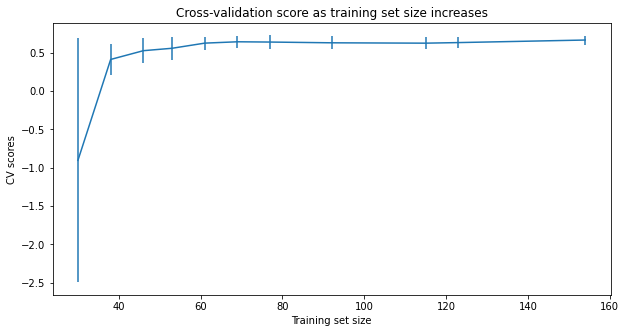

In [ ]:
plt.subplots(figsize=(10, 5))
plt.errorbar(train_size, test_scores_mean, yerr=test_scores_std)
plt.xlabel('Training set size')
plt.ylabel('CV scores')
plt.title('Cross-validation score as training set size increases');

This shows that you seem to have plenty of data. There's an initial rapid improvement in model scores as one would expect, but it's essentially levelled off by around a sample size of 40-50.

## 4.11 Save best model object<a id='4.10_Save_best_model_object'></a>

In [ ]:
best_model = rf_grid_cv.best_estimator_
best_model.version = '1.0'
best_model.pandas_version = pd.__version__
best_model.numpy_version = np.__version__
best_model.sklearn_version = sklearn_version
best_model.X_columns = [col for col in X_train.columns]
best_model.build_datetime = datetime.datetime.now()

In [ ]:
# save the model

modelpath = '../models'
save_file(best_model, 'ECG_model.pkl', modelpath)

Directory ../models was created.
Writing file.  "../models\ski_resort_pricing_model.pkl"
